## Analyzing the block $C_1$ for the Cube

In [1]:
load("../util.sage")

In [2]:
C1 = load('blocks/linear_block_1')

In [3]:
# simplify the expression of each block input
C1 = C1.apply_map(lambda x: x.simplify_real().combine()); show(C1)

[                                                                                                                                     24*c - 1/12*sqrt(3) - 3/8*sqrt(2) - 3/4       24*c - 1/3*(sqrt(3)*t + sqrt(3))/(t^3 + 3*t^2 + 3*t + 1) - 3*(t + 3)/(3*t^2 + 2*t + 3)^(3/2) + 3*(t - 3)/(3*t^2 - 2*t + 3)^(3/2) - 1/3*(sqrt(3)*t - sqrt(3))/(t - 1)^3]
[24*c*t - 1/3*(sqrt(3)*t + sqrt(3))/(t^3 + 3*t^2 + 3*t + 1) - 3*(3*t + 1)/(3*t^2 + 2*t + 3)^(3/2) - 3*(3*t - 1)/(3*t^2 - 2*t + 3)^(3/2) + 1/3*(sqrt(3)*t - sqrt(3))/(t - 1)^3                                                                                                                               24*c*t - 1/24*(2*sqrt(3) + 9*sqrt(2) + 18)/t^2]

In [4]:
# Obtain the simplified expression
p1 = simplify_expression(C1.det())

In [5]:
# checks if p1 was modified after simplification
print(bool(p1==C1.det()))


True


In [6]:
# Calculate the values of u for t = 0 and t = 1

# Solve 3*t^2 + 2*t + 3 = u^2 for u
sol_u = solve(u**2 == 3*t^2 + 2*t + 3, u)[0].rhs()

# Solve 3*t^2 - 2*t + 3 = v^2 for v
sol_v = solve(v**2 == 3*t^2 - 2*t + 3, v)[0].rhs()

# Get the values of u for t=0 and t=1
u0 = sol_u(t=1/2)
u1 = sol_u(t=1)

# Get the values of v for t=1/3 and t=1
v0 = sol_v(t=1/3)
v1 = sol_v(t=1)

u0, u1, v0, v1

(1/2*sqrt(19), 2*sqrt(2), 2*sqrt(2/3), 2)

### Proof Lemma 5:
#### 1. $\gamma_1(t)$ is negative for $t$ in $(0,1)$.

##### Change of variables:  $v^2 = 3t^2 - 2t + 3$, $u^2=3t^2 + 2t + 3$ 

In [7]:
γ1 = p1.coefficients()[1][0]; show(γ1)

-2*sqrt(3)*t - 9*sqrt(2)*t - 18*t + 72*(t^2 + 6*t + 1)/(3*t^2 + 2*t + 3)^(3/2) - 72*(t^2 - 6*t + 1)/(3*t^2 - 2*t + 3)^(3/2) + 8*sqrt(3)/(t + 1) + 8*sqrt(3)/(t - 1) - (2*sqrt(3) + 9*sqrt(2) + 18)/t^2

In [8]:
t, u, v = var('t, u, v')
assume(u>0); assume(v>0)
γ1_uvt_numerator = γ1.subs({(3*t^2 - 2*t + 3):v^2}).subs({(3*t^2 + 2*t + 3):u^2}).factor().numerator()

##### Calculates the Möbius coefficient

In [9]:
coefficient_dict = polynomial_to_dict(γ1_uvt_numerator)

In [10]:
variables = γ1_uvt_numerator.variables()
total_degree  =  [γ1_uvt_numerator.degree(j) for j in variables]
n_uplas = [
    [i, j, k]
    for i in range(total_degree[0] + 1)
    for j in range(total_degree[1] + 1)
    for k in range(total_degree[2] + 1)
]

In [11]:
#Creating the partition

q1 = 3*t^2 + 2*t + 3
q2 = 3*t^2 - 2*t + 3

# Calculate the values of u and v for t = 0 and t = 1/2
(u0, u1) = quadratic_extrema_on_interval(q1, (0, 1/2))
(v0, v1) = quadratic_extrema_on_interval(q2, (0,1/2))
variable_ranges_0 = [ (0, 1/2), (u0, u1), (v0, v1)]

# Calculate the values of u and  for t = 1/2 and t = 1
(u0, u1) = quadratic_extrema_on_interval(q1, (1/2, 1))
(v0, v1) = quadratic_extrema_on_interval(q2, (1/2, 1) )
variable_ranges_1 = [ (1/2, 1), (u0, u1), (v0, v1)]


all_variable_ranges = [variable_ranges_0, variable_ranges_1]

In [12]:

import time

# Inicialize a lista de coeficientes

# Capture o tempo de início
start_time = time.time()

for variable_ranges in all_variable_ranges:
    sign_coeff_set = set()
    for i, degree_per_variable in enumerate(n_uplas):
        
        c = moebius_coefficient(γ1_uvt_numerator, degree_per_variable, total_degree, variable_ranges, coefficient_dict)
    
        # if i % 1000 == 0:
        #     elapsed_time = time.time() - start_time
        #     elapsed_time_minutes = elapsed_time / 60
        #     print(f"Iteração: {i}, Tempo decorrido: {elapsed_time_minutes:.2f} minutos")
        #     print("Conjunto parcial de coeficientes:", sign_coeff_set)  
        #     print("\n")
        
        
        if c.is_zero():         
             continue
    
        else:
            sign_coeff = sign(c.simplify_full())
            sign_coeff_set.add(sign_coeff)
    
        if 1 in sign_coeff_set and -1 in sign_coeff_set:
            
            print(f"Terminating at iteration {i} because the set contains 1 and -1.")
            break

    print("Final set of coefficients for t in {}: {}.".format(variable_ranges[0], sign_coeff_set))



Final set of coefficients for t in (0, 1/2): {1}.
Final set of coefficients for t in (1/2, 1): {1}.


In [13]:
# coeff_variable_ranges_0 = []
# for i, degree_per_variable in enumerate(n_uplas):    
#     c = moebius_coefficient(γ1_uvt_numerator, degree_per_variable, total_degree, variable_ranges, coefficient_dict)
#     coeff_variable_ranges_0.append(c)

In [14]:
# coefficient_signs = set([sign(c) for c in coeff])

In [15]:
# set(coefficient_signs)

##### Limit at the extremes

In [16]:
limit(γ1, t=0, dir='+'), limit(γ1, t=1, dir='-')

(-Infinity, -Infinity)

#### 2. $\gamma_0(t)$ is positive for $t$ in $(0,1)$.

In [17]:
γ0 = p1.coefficients()[0][0]

##### Change of variables:  $v^2 = 3t^2 - 2t + 3$, $u^2=3t^2 + 2t + 3$ and $t=(u^2-v^2)/4$

In [22]:
γ0_uvt_numerator = γ0.subs({(3*t^2 - 2*t + 3):v^2}).subs({(3*t^2 + 2*t + 3):u^2}).factor().numerator(); #show(α10_u_v)

##### Calculates the Möbius coefficient

In [23]:
coefficient_dict = polynomial_to_dict(γ0_uvt_numerator)

In [24]:
variables = γ0_uvt_numerator.variables()
total_degree  =  [γ0_uvt_numerator.degree(j) for j in variables]
n_uplas = [
    [i, j, k]
    for i in range(total_degree[0] + 1)
    for j in range(total_degree[1] + 1)
    for k in range(total_degree[2] + 1)
]

In [25]:

## Creating the partition

q1 = 3*t^2 + 2*t + 3
q2 = 3*t^2 - 2*t + 3

# Calculate the values of u and v for t = 0 and t = 1
(u0, u1) = quadratic_extrema_on_interval(q1, (0, 1))
(v0, v1) = quadratic_extrema_on_interval(q2, (0, 1))
variable_ranges_0 = [(0, 1), (u0, u1), (v0, v1)]
all_variable_ranges = [variable_ranges_0]

In [26]:
import time

# Inicialize a lista de coeficientes

# Capture o tempo de início
start_time = time.time()

for variable_ranges in all_variable_ranges:
    sign_coeff_set = set()
    for i, degree_per_variable in enumerate(n_uplas):
        
        c = moebius_coefficient(γ0_uvt_numerator, degree_per_variable, total_degree, variable_ranges, coefficient_dict)
       
        # if i % 1000 == 0:
        #     elapsed_time = time.time() - start_time
        #     elapsed_time_minutes = elapsed_time / 60
        #     print(f"Iteração: {i}, Tempo decorrido: {elapsed_time_minutes:.2f} minutos")
        #     print("Conjunto parcial de coeficientes:", sign_coeff_set)  
        #     print("\n")
        
        
        if c.is_zero():         
             continue
    
        else:
            sign_coeff = sign(c.simplify_full())
            sign_coeff_set.add(sign_coeff)
    
        if 1 in sign_coeff_set and -1 in sign_coeff_set:
            
            print(f"Encerrando na iteração {i} pois o conjunto contém 1 e -1.")
            break
            
        
    print("Conjunto final de coeficientes para t em {}: {}.".format(variable_ranges[0], sign_coeff_set) )


Conjunto final de coeficientes para t em (0, 1): {1}.


#####  Checking the sign of Möbius coefficients

In [ ]:
#coefficient_signs = set([sign(c) for c in coeff])

In [ ]:
#set(coefficient_signs)

##### Limit at the extremes

In [27]:
limit(γ0, t=0, dir='+'), limit(γ0, t=1, dir='-')

(+Infinity, +Infinity)

#### 3. $(C_1)_{11}(c(t),t)$ is positive for  $t$ in $(0,1)$.

##### Change of variables:  $v^2 = 3t^2 - 2t + 3$, $u^2=3t^2 + 2t + 3$.

In [28]:
C11 = C1[0,0].subs(c = -γ0/γ1)
C11_numerator = C11.numerator().simplify_real()

In [ ]:
var('u,v')
assume(u>0)
assume(v>0)
C11_uvt_numerator = C11_numerator.subs({q2:v^2}).subs({q1:u^2}).simplify_real().combine()

In [ ]:
C11_uvt_numerator = C11_uvt_numerator.expand().combine()

In [ ]:
def test_zero(p):
    u0 = sqrt(q1.subs(t=0))
    v0 = sqrt(q2.subs(t=0))
    return p.subs(t=0, u=u0, v=v0)
#test_zero(C11_uvt_numerator)

In [ ]:
C11_uvt_numerator_sympy =  C11_uvt_numerator._sympy_()
import sympy
C11_numerator_sympy = sympy.factor(C11_uvt_numerator_sympy/t**(2))

In [ ]:
C11_numerator_sympy.factor()

##### Calculates the Möbius coefficient

In [ ]:
coefficient_dict = polynomial_to_dict(C11_uvt_numerator)

In [ ]:
variables = C11_uvt_numerator.variables()
total_degree  =  [C11_uvt_numerator.degree(j) for j in variables]
n_uplas = [
    [i, j]
    for i in range(total_degree[0] + 1)
    for j in range(total_degree[1] + 1)
    
]

##### Calculates the Möbius coefficient

In [32]:
coefficient_dict = polynomial_to_dict(C11_uvt_numerator)

In [35]:
variables = C11_uvt_numerator.variables()
total_degree  =  [C11_uvt_numerator.degree(j) for j in variables]
n_uplas = [
    [i, j]
    for i in range(total_degree[0] + 1)
    for j in range(total_degree[1] + 1)
    
]

In [ ]:
#variable_ranges_2 = [ (1/8, 1), (u0, u1), (v0, v1)]
#variable_ranges_1 = [ (1/64, 1/8), (u0, u1), (v0, v1)]
#variable_ranges_0 = [ (0, 1/64), (u0, u1), (v0, v1)]
#all_variable_ranges_3 = [variable_ranges_1]


q1 = 3*t^2 + 2*t + 3 #u
q2 = 3*t^2 - 2*t + 3 #v

# Calculate the values of u and v for t = 0 and t = 1/2
(u0, u1) = quadratic_extrema_on_interval(q1, (1/16, 1/4))
(v0, v1) = quadratic_extrema_on_interval(q2, (1/16, 1/4))
variable_ranges_0 = [(1/16, 1/4), (u0, u1), (v0, v1)]

# Calculate the values of u and v for t = 1/4 and t = 1/2
(u0, u1) = quadratic_extrema_on_interval(q1, (1/4, 1/2))
(v0, v1) = quadratic_extrema_on_interval(q2, (1/4, 1/2))
variable_ranges_1 = [(1/4, 1/2), (u0, u1), (v0, v1)]

# Calculate the values of u and  for t = 1/2 and t = 1
(u0, u1) = quadratic_extrema_on_interval(q1, (1/2, 1))
(v0, v1) = quadratic_extrema_on_interval(q2, (1/2, 1) )
variable_ranges_2 = [ (1/2, 1), (u0, u1), (v0, v1)]


all_variable_ranges = [variable_ranges_0 ]

In [ ]:
plot([q1, q2])

In [ ]:

import time

# Inicialize a lista de coeficientes

# Capture o tempo de início
start_time = time.time()

for variable_ranges in all_variable_ranges:
    sign_coeff_set = set()
    for i, degree_per_variable in enumerate(n_uplas):
        
        c = moebius_coefficient(C11_uvt_numerator, degree_per_variable, total_degree, variable_ranges, coefficient_dict)
    
        if i % 100 == 0:
            elapsed_time = time.time() - start_time
            elapsed_time_minutes = elapsed_time / 60
            print(f"Iteração: {i}, Tempo decorrido: {elapsed_time_minutes:.2f} minutos")
            print("Conjunto parcial de coeficientes:", sign_coeff_set)  
            print("\n")
        
        
        if c.is_zero():         
             continue
    
        else:
            sign_coeff = sign(c.simplify_full())
            sign_coeff_set.add(sign_coeff)
    
        if 1 in sign_coeff_set and -1 in sign_coeff_set:
            
            print(f"Encerrando na iteração {i} pois o conjunto contém 1 e -1.")
            break
            
        
    print("Conjunto final de coeficientes para t em {}: {}.".format(variable_ranges[0], sign_coeff_set) )


In [ ]:
uu = q1(t=0)
vv= q2(t=0)
C11_uvt_numerator.subs(t=0, u=uu, v=vv)

In [60]:
variables = C11_uvt_numerator.variables()
total_degree  =  [C11_uvt_numerator.degree(j) for j in variables]
n_uplas = [
    [i, j, k]
    for i in range(total_degree[0] + 1)
    for j in range(total_degree[1] + 1)
    for k in range(total_degree[2] + 1)
]

In [80]:
#variable_ranges_2 = [ (1/8, 1), (u0, u1), (v0, v1)]
#variable_ranges_1 = [ (1/64, 1/8), (u0, u1), (v0, v1)]
#variable_ranges_0 = [ (0, 1/64), (u0, u1), (v0, v1)]
#all_variable_ranges_3 = [variable_ranges_1]


q1 = 3*t^2 + 2*t + 3 #u
q2 = 3*t^2 - 2*t + 3 #v

# Calculate the values of u and v for t = 0 and t = 1/2
(u0, u1) = quadratic_extrema_on_interval(q1, (1/16, 1/4))
(v0, v1) = quadratic_extrema_on_interval(q2, (1/16, 1/4))
variable_ranges_0 = [(1/16, 1/4), (u0, u1), (v0, v1)]

# Calculate the values of u and v for t = 1/4 and t = 1/2
(u0, u1) = quadratic_extrema_on_interval(q1, (1/4, 1/2))
(v0, v1) = quadratic_extrema_on_interval(q2, (1/4, 1/2))
variable_ranges_1 = [(1/4, 1/2), (u0, u1), (v0, v1)]

# Calculate the values of u and  for t = 1/2 and t = 1
(u0, u1) = quadratic_extrema_on_interval(q1, (1/2, 1))
(v0, v1) = quadratic_extrema_on_interval(q2, (1/2, 1) )
variable_ranges_2 = [ (1/2, 1), (u0, u1), (v0, v1)]


all_variable_ranges = [variable_ranges_0 ]

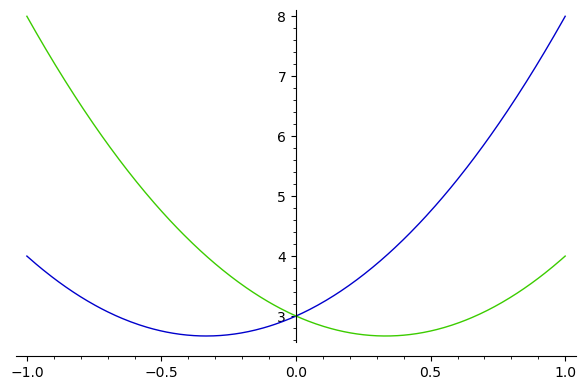

In [108]:
plot([q1, q2])

In [81]:

import time

# Inicialize a lista de coeficientes

# Capture o tempo de início
start_time = time.time()

for variable_ranges in all_variable_ranges:
    sign_coeff_set = set()
    for i, degree_per_variable in enumerate(n_uplas):
        
        c = moebius_coefficient(C11_uvt_numerator, degree_per_variable, total_degree, variable_ranges, coefficient_dict)
    
        if i % 100 == 0:
            elapsed_time = time.time() - start_time
            elapsed_time_minutes = elapsed_time / 60
            print(f"Iteração: {i}, Tempo decorrido: {elapsed_time_minutes:.2f} minutos")
            print("Conjunto parcial de coeficientes:", sign_coeff_set)  
            print("\n")
        
        
        if c.is_zero():         
             continue
    
        else:
            sign_coeff = sign(c.simplify_full())
            sign_coeff_set.add(sign_coeff)
    
        if 1 in sign_coeff_set and -1 in sign_coeff_set:
            
            print(f"Encerrando na iteração {i} pois o conjunto contém 1 e -1.")
            break
            
        
    print("Conjunto final de coeficientes para t em {}: {}.".format(variable_ranges[0], sign_coeff_set) )


Iteração: 0, Tempo decorrido: 0.00 minutos
Conjunto parcial de coeficientes: set()


Iteração: 100, Tempo decorrido: 0.21 minutos
Conjunto parcial de coeficientes: {1}


Iteração: 200, Tempo decorrido: 0.41 minutos
Conjunto parcial de coeficientes: {1}


Iteração: 300, Tempo decorrido: 0.62 minutos
Conjunto parcial de coeficientes: {1}


Iteração: 400, Tempo decorrido: 0.89 minutos
Conjunto parcial de coeficientes: {1}


Iteração: 500, Tempo decorrido: 1.16 minutos
Conjunto parcial de coeficientes: {1}


Iteração: 600, Tempo decorrido: 1.43 minutos
Conjunto parcial de coeficientes: {1}


Conjunto final de coeficientes para t em (1/16, 1/4): {1}.


In [72]:
uu = q1(t=0)
vv= q2(t=0)
C11_uvt_numerator.subs(t=0, u=uu, v=vv)

0

In [ ]:
# coeff = []
# for i, degree_per_variable in enumerate(n_uplas):
    
#     c = moebius_coefficient(C11_uvt_numerator, degree_per_variable, total_degree, variable_ranges, coefficient_dict)
#     coeff.append(c)

In [ ]:
variable_ranges_2 = [ (1/8, 1), (u0, u1), (v0, v1)]
variable_ranges_1 = [ (1/64, 1/8), (u0, u1), (v0, v1)]
variable_ranges_0 = [ (0, 1/64), (u0, u1), (v0, v1)]
all_variable_ranges_3 = [variable_ranges_1]

In [ ]:

import time

# Inicialize a lista de coeficientes

# Capture o tempo de início
start_time = time.time()

for variable_ranges in all_variable_ranges_3:
    sign_coeff_set = set()
    for i, degree_per_variable in enumerate(n_uplas):
        
        c = moebius_coefficient(C11_uvt_numerator, degree_per_variable, total_degree, variable_ranges, coefficient_dict)
    
        # if i % 1000 == 0:
        #     elapsed_time = time.time() - start_time
        #     elapsed_time_minutes = elapsed_time / 60
        #     print(f"Iteração: {i}, Tempo decorrido: {elapsed_time_minutes:.2f} minutos")
        #     print("Conjunto parcial de coeficientes:", sign_coeff_set)  
        #     print("\n")
        
        
        if c.is_zero():         
             continue
    
        else:
            sign_coeff = sign(c.simplify_full())
            sign_coeff_set.add(sign_coeff)
    
        if 1 in sign_coeff_set and -1 in sign_coeff_set:
            
            print(f"Encerrando na iteração {i} pois o conjunto contém 1 e -1.")
            break
            
        
    print("Conjunto final de coeficientes para t em {}: {}.".format(variable_ranges[0], sign_coeff_set) )


In [ ]:
# coeff = []
# for i, degree_per_variable in enumerate(n_uplas):
    
#     c = moebius_coefficient(C11_uvt_numerator, degree_per_variable, total_degree, variable_ranges, coefficient_dict)
#     coeff.append(c)

In [ ]:
variable_ranges_2 = [ (1/64, 1/32), (u0, u1), (v0, v1)]
variable_ranges_1 = [ (1/4, 3/4), (u0, u1), (v0, v1)]
variable_ranges_0 = [ (0, 1/64), (u0, u1), (v0, v1)]
all_variable_ranges_3 = [variable_ranges_0, variable_ranges_1, variable_ranges_2]

In [ ]:

import time

# Inicialize a lista de coeficientes

# Capture o tempo de início
start_time = time.time()
sign_coeff_set = set()
for variable_ranges in all_variable_ranges_3:
    for i, degree_per_variable in enumerate(n_uplas):
        
        c = moebius_coefficient(C11_uvt_numerator, degree_per_variable, total_degree, variable_ranges, coefficient_dict)
    
        # if i % 1000 == 0:
        #     elapsed_time = time.time() - start_time
        #     elapsed_time_minutes = elapsed_time / 60
        #     print(f"Iteração: {i}, Tempo decorrido: {elapsed_time_minutes:.2f} minutos")
        #     print("Conjunto parcial de coeficientes:", sign_coeff_set)  
        #     print("\n")
        
        
        if c.is_zero():         
             continue
    
        else:
            sign_coeff = sign(c.simplify_full())
            sign_coeff_set.add(sign_coeff)
    
        if 1 in sign_coeff_set and -1 in sign_coeff_set:
            
            print(f"Encerrando na iteração {i} pois o conjunto contém 1 e -1.")
            break
            
        
    print("Conjunto final de coeficientes para t em {}: {}.".format(variable_ranges[0], sign_coeff_set) )


In [ ]:
# coeff = []
# for i, degree_per_variable in enumerate(n_uplas):
    
#     c = moebius_coefficient(C11_uvt_numerator, degree_per_variable, total_degree, variable_ranges, coefficient_dict)
#     coeff.append(c)

#####  Checking the sign of Möbius coefficients

In [ ]:
coefficient_signs = set([sign(c) for c in coeff])

In [ ]:
set(coefficient_signs)

##### Limit at the extremes

In [ ]:
limit(C11, t=0, dir='+'), limit(C11, t=1, dir='-')

##### 5. There exits a $\delta<1$ such $(O_1)_{12}(c(t),t)$ is negative for $t$ in $(0,\delta)$ and is positive for $t$ in $(\delta,1)$ .

In [ ]:
C12 = C1[0,1].subs(c = -γ0/γ1)
C12_diff = diff(C12, t) # derivative

In [ ]:
C12_diff_numerator = C12_diff.numerator().simplify_real().expand().combine()

In [ ]:
C12_diff_numerator_uvt = C12_diff_numerator.subs({(3*t^2 - 2*t + 3):v^2}).subs({(3*t^2 + 2*t + 3):u^2}).simplify_real().expand().combine()

##### Calculates the Möbius coefficient

In [ ]:
coefficient_dict = polynomial_to_dict(C12_diff_numerator_uvt)

In [ ]:
variables = C12_diff_numerator_uvt.variables()
total_degree  =  [C12_diff_numerator_uvt.degree(j) for j in variables]
n_uplas = [
    [i, j, k]
    for i in range(total_degree[0] + 1)
    for j in range(total_degree[1] + 1)
    for k in range(total_degree[2] + 1)
]
len(n_uplas)

In [ ]:
# coeff = []
# for i, degree_per_variable in enumerate(n_uplas):    
#     c = moebius_coefficient(C12_diff_numerator_uvt, degree_per_variable, total_degree, variable_ranges, coefficient_dict)
#     coeff.append(c)

In [ ]:
import time

# Inicialize a lista de coeficientes

# Capture o tempo de início
start_time = time.time()
sign_coeff_set = set()
variable_ranges = [(0, 1), (u0, u1), (v0, v1)]
for i, degree_per_variable in enumerate(n_uplas):
    
    c = moebius_coefficient(C12_diff_numerator_uvt, degree_per_variable, total_degree, variable_ranges, coefficient_dict)

    if i % 1000 == 0:
        elapsed_time = time.time() - start_time
        elapsed_time_minutes = elapsed_time / 60
        print(f"Iteração: {i}, Tempo decorrido: {elapsed_time_minutes:.2f} minutos")
        print("Conjunto parcial de coeficientes:", sign_coeff_set)  
        print("\n")
    
    
    if c.is_zero():         
         continue

    else:
        sign_coeff = sign(c.simplify_full())
        sign_coeff_set.add(sign_coeff)

    if 1 in sign_coeff_set and -1 in sign_coeff_set:
        
        print(f"Encerrando na iteração {i} pois o conjunto contém 1 e -1.")
        break
        
    
print("Conjunto final de coeficientes:", sign_coeff_set)  

In [ ]:
import time

# Inicialize a lista de coeficientes

# Capture o tempo de início
start_time = time.time()
sign_coeff_set = set()

for i, degree_per_variable in enumerate(n_uplas):
    
    c = moebius_coefficient(C12_diff_numerator_uvt, degree_per_variable, total_degree, variable_ranges, coefficient_dict)

    if i % 100 == 0:
        elapsed_time = time.time() - start_time
        elapsed_time_minutes = elapsed_time / 60
        print(f"Iteração: {i}, Tempo decorrido: {elapsed_time_minutes:.2f} minutos")
        print("Conjunto parcial de coeficientes:", sign_coeff_set)  
        print("\n")
    
    
    if c.is_zero():         
         continue

    else:
        sign_coeff = sign(c.simplify_full())
        sign_coeff_set.add(sign_coeff)

    if 1 in sign_coeff_set and -1 in sign_coeff_set:
        
        print(f"Encerrando na iteração {i} pois o conjunto contém 1 e -1.")
        break
        
    
print("Conjunto final de coeficientes:", sign_coeff_set)  

#####  Checking the sign of Möbius coefficients

In [ ]:
coefficient_signs = set([sign(c) for c in coeff])

In [ ]:
set(coefficient_signs)

##### Limit at the extremes

In [ ]:
bool(limit(C12, t=0, dir='+')< 0), bool(limit(C11, t=1, dir='-') > 0)